In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('C:/Users/karan/tco_amos_3.csv')

In [4]:
data

,Crash_ID,COUNTY_FIPS,CNT,INC,INO,INS,WW1,WW3,WW2,WW4,...,Y20,Y21,STATE,PPN,INR,ST,ST2,ST3,ST1,LOG_INR
0,15585669,48141,El Paso,0,0,2850,0.324254,90.466926,4.824903,0.025940,...,0,0,Texas,839238,339.593774,1,0,0,1,5.827750
1,16473665,48241,Jasper,1,1,128,0.000000,67.751479,18.047337,0.295858,...,0,0,Texas,35529,360.269076,1,0,0,1,5.886851
2,16585839,48113,Dallas,1,1,9934,0.005244,73.614388,13.774841,0.194012,...,0,0,Texas,2635516,376.928085,1,0,0,1,5.932054
3,16824710,48303,Lubbock,2,1,1596,0.489274,78.208506,14.076026,0.940911,...,0,0,Texas,310569,513.895463,1,0,0,1,6.242020
4,16824789,48201,Harris,0,0,13527,0.002966,70.935405,17.533662,0.418174,...,0,0,Texas,4713325,286.994850,1,0,0,1,5.659464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,10212672,8103,RIO BLANCO,2,1,25,0.000000,73.529412,11.764706,1.470588,...,0,1,Colorado,6442,388.078237,2,1,0,0,5.961207
1181,10214252,8009,BACA,0,0,10,0.000000,75.757576,0.000000,0.000000,...,0,1,Colorado,3490,286.532951,2,1,0,0,5.657854
1182,10214428,8065,LAKE,1,1,26,8.695652,78.260870,4.347826,0.000000,...,0,1,Colorado,7395,351.588911,2,1,0,0,5.862463
1183,10215666,8017,CHEYENNE,1,1,9,0.000000,86.666667,0.000000,6.666667,...,0,1,Colorado,1719,523.560209,2,1,0,0,6.260652


In [5]:
data.columns

Index(['Crash_ID', 'COUNTY_FIPS', 'CNT', 'INC', 'INO', 'INS', 'WW1', 'WW3',
       'WW2', 'WW4', 'WW9', 'WW10', 'WW5', 'WW6', 'WW7', 'WW8', 'LL1', 'LL2',
       'LL3', 'LL4', 'LL5', 'LL6', 'LL7', 'LL8', 'HF1', 'HF2', 'RR1', 'RR2',
       'RR4', 'RR3', 'RR5', 'RR6', 'RR7', 'RR8', 'NO_INJURY', 'YES_INJURY',
       'IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6', 'YCA', 'Y19', 'Y20', 'Y21',
       'STATE', 'PPN', 'INR', 'ST', 'ST2', 'ST3', 'ST1', 'LOG_INR'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cols = ['WW1', 'WW3',
       'WW2', 'WW4', 'WW9', 'WW10', 'WW5', 'WW6', 'WW7', 'WW8', 'LL1', 'LL2',
       'LL3', 'LL4', 'LL5', 'LL6', 'LL7', 'LL8', 'HF1', 'HF2', 'RR1', 'RR2',
       'RR4', 'RR3', 'RR5', 'RR6', 'RR7', 'RR8','IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6'
       ]

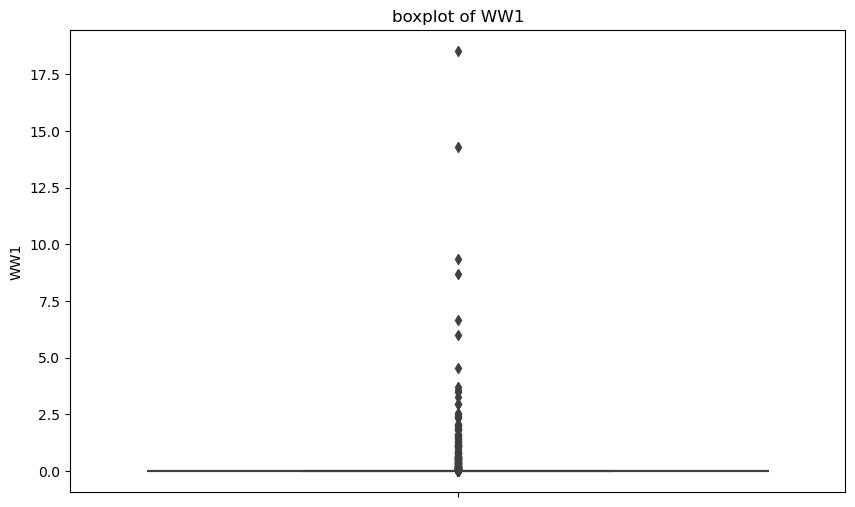

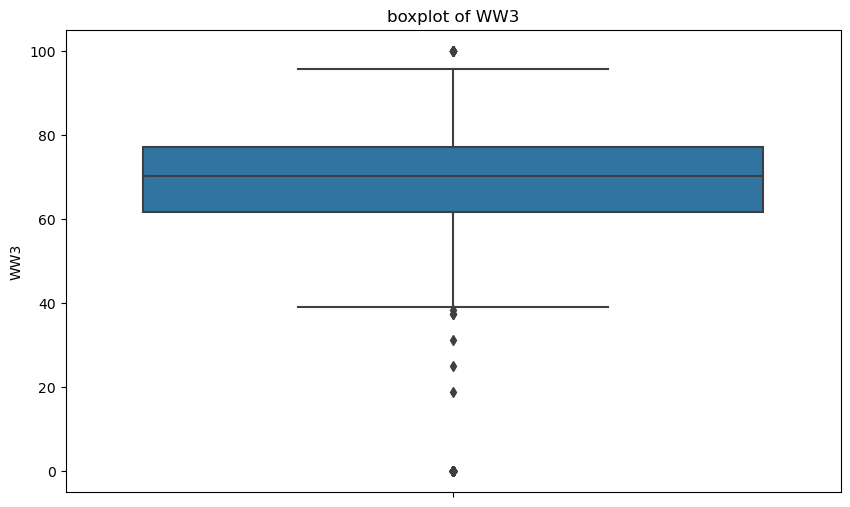

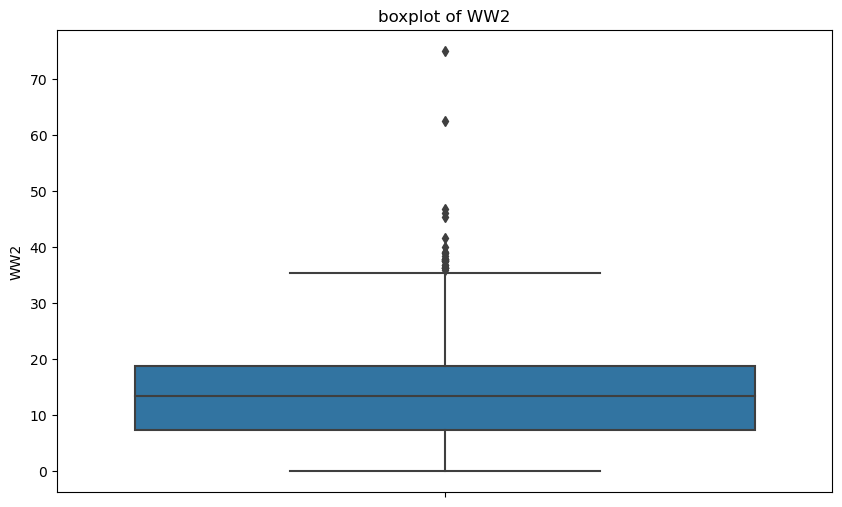

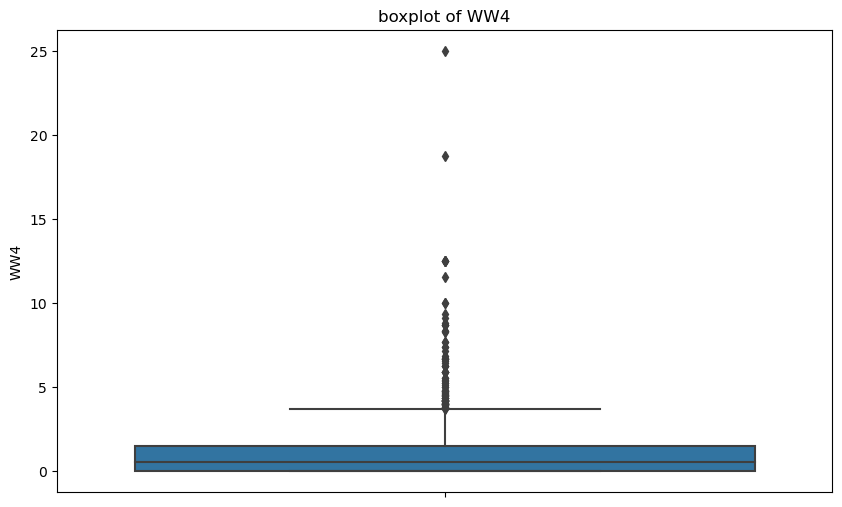

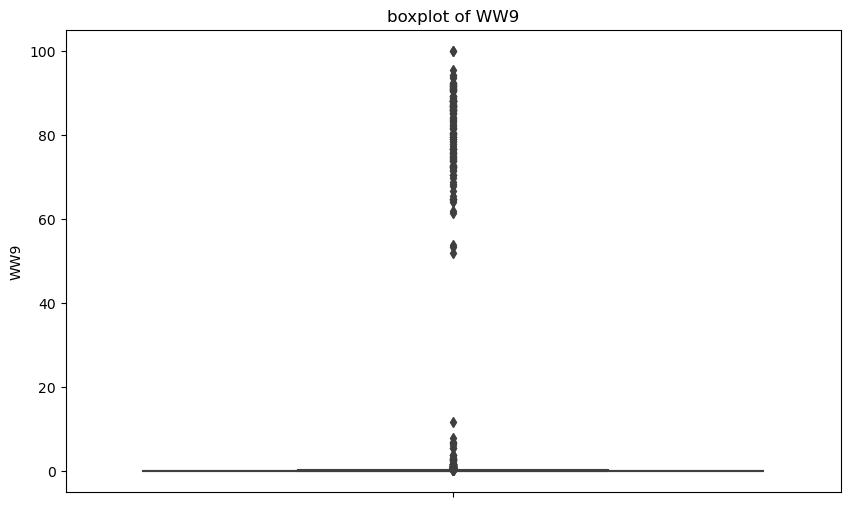

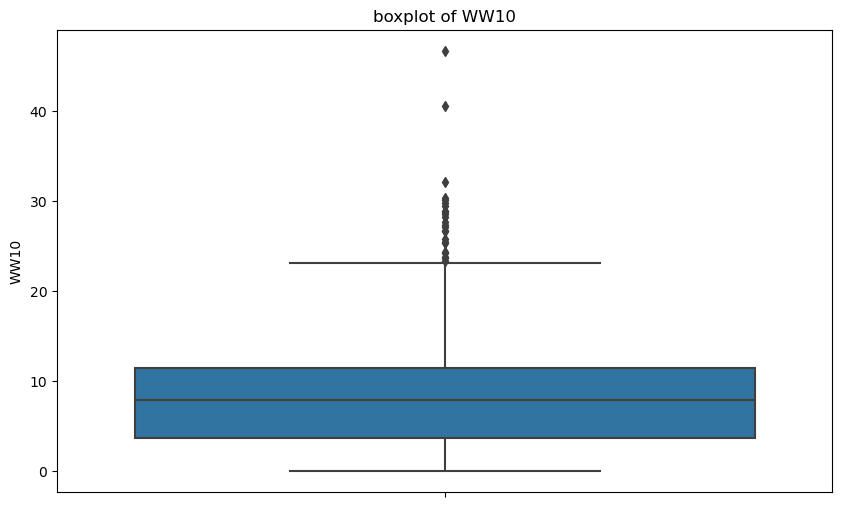

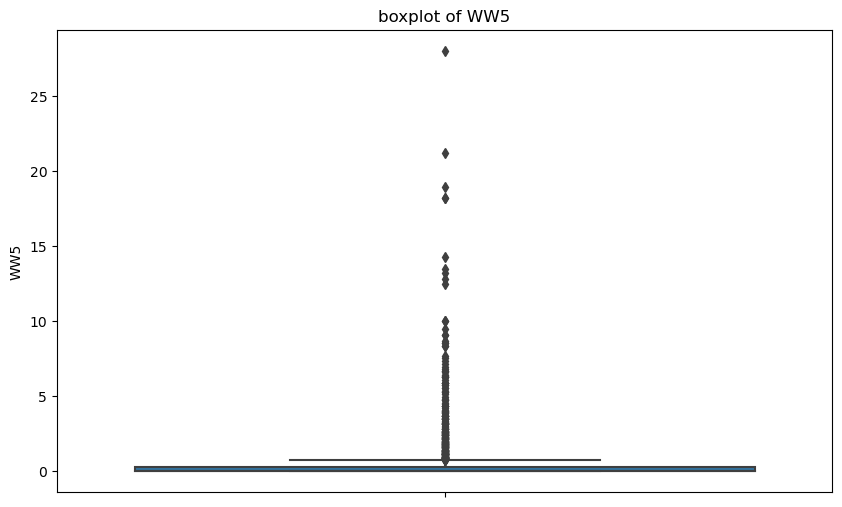

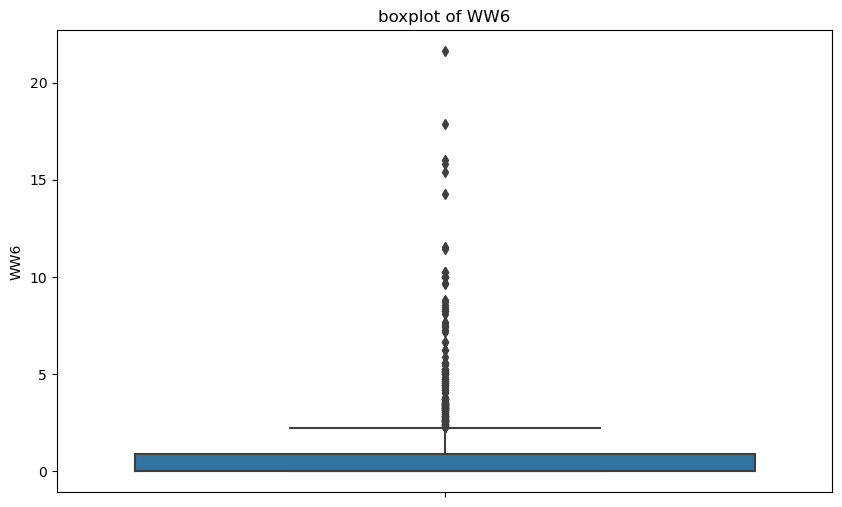

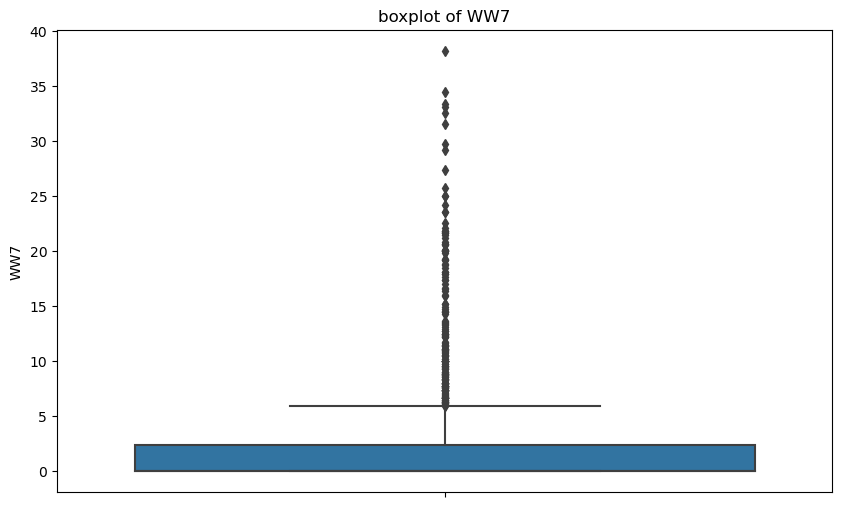

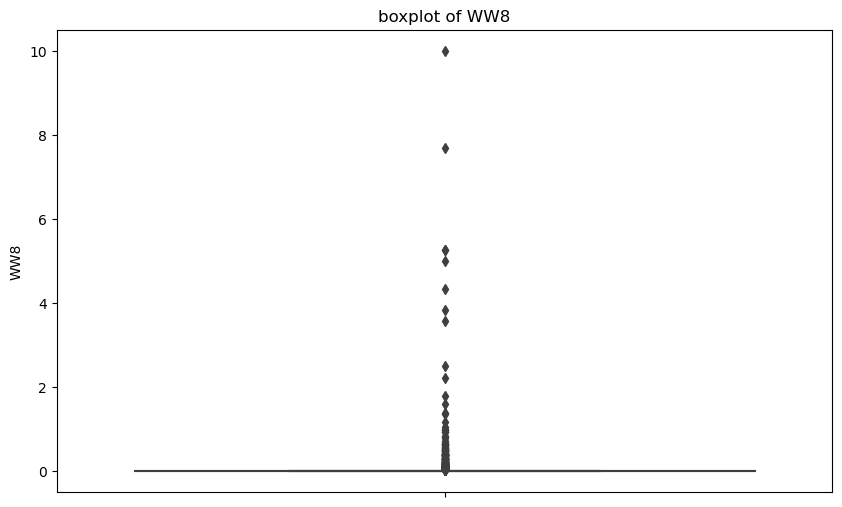

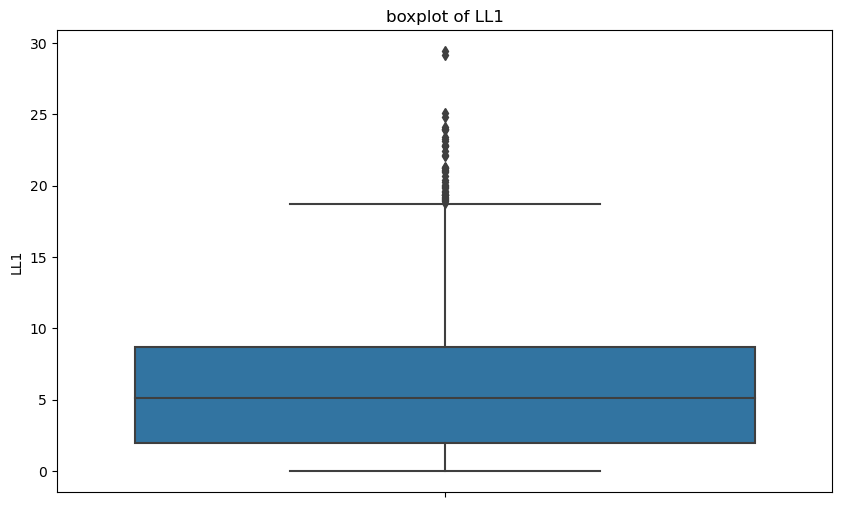

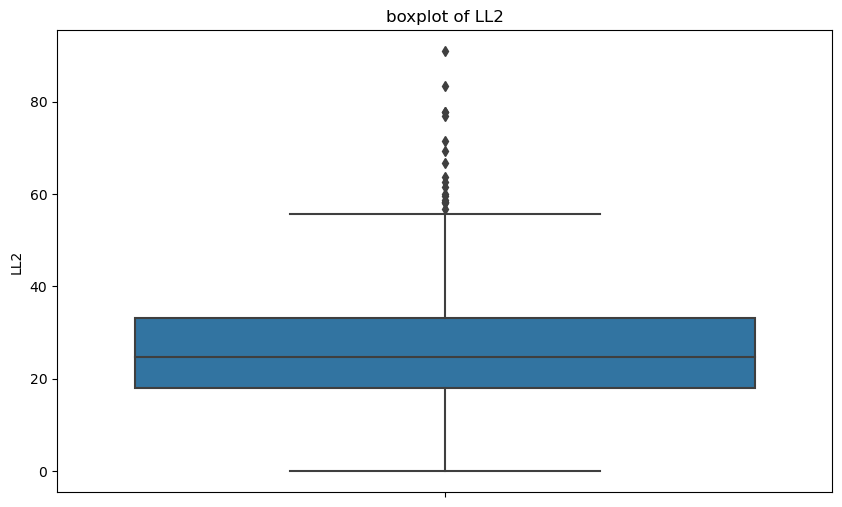

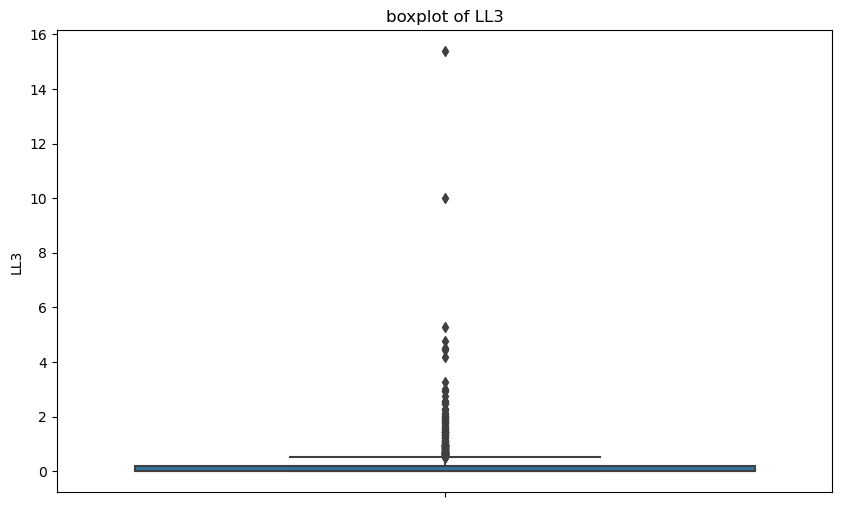

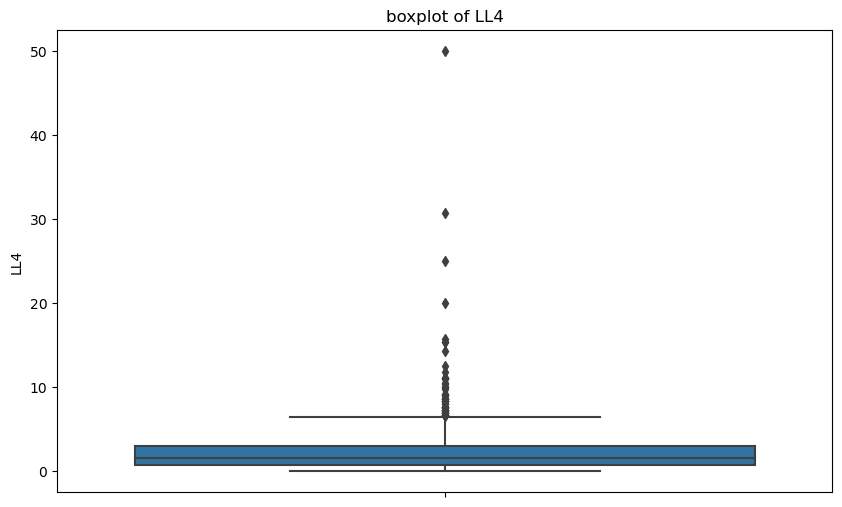

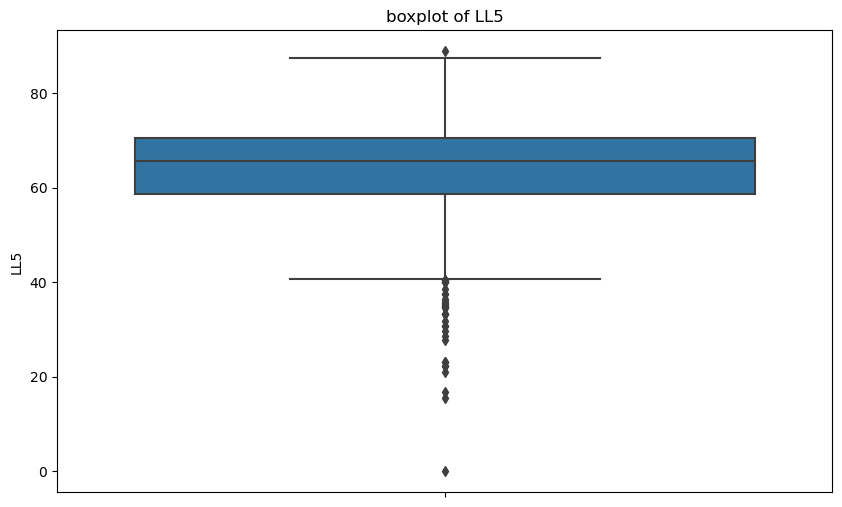

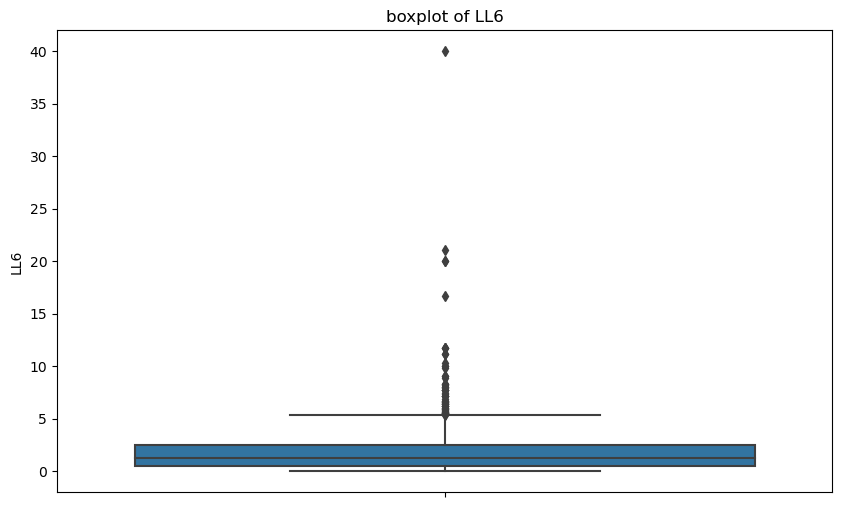

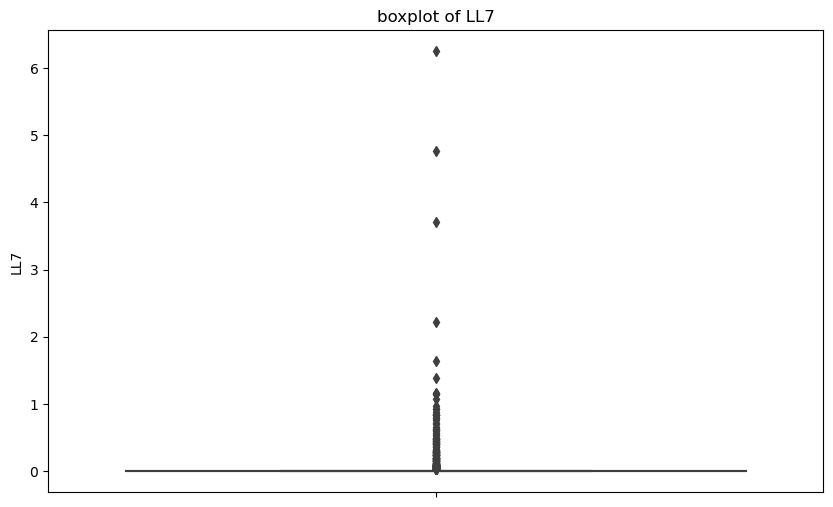

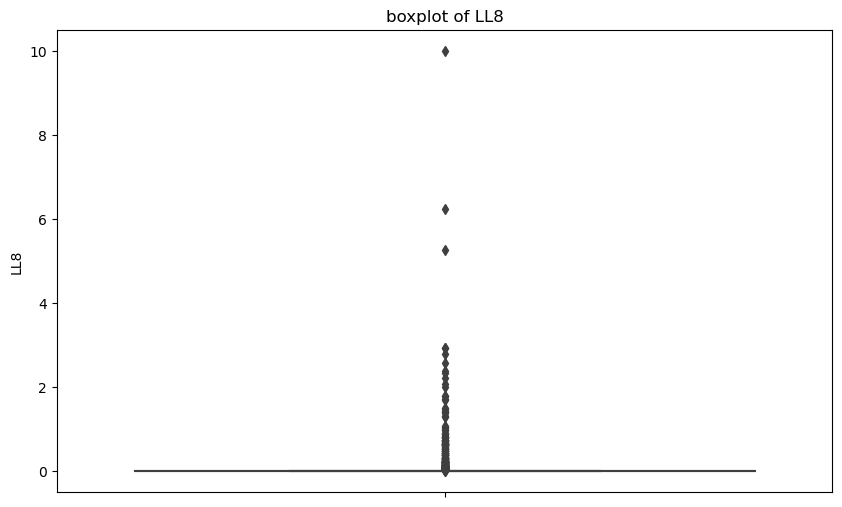

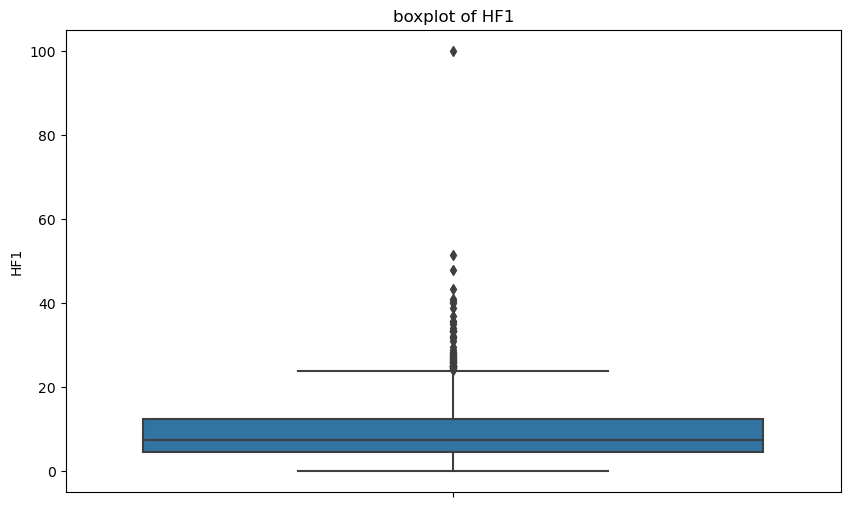

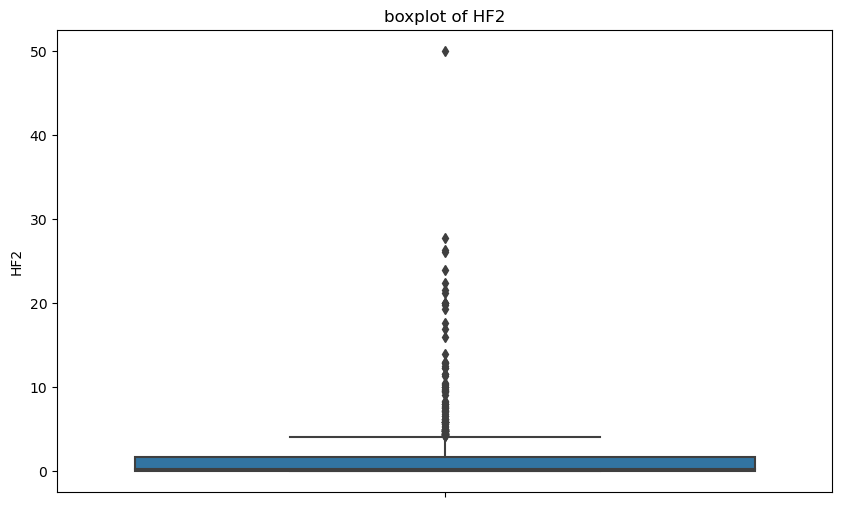

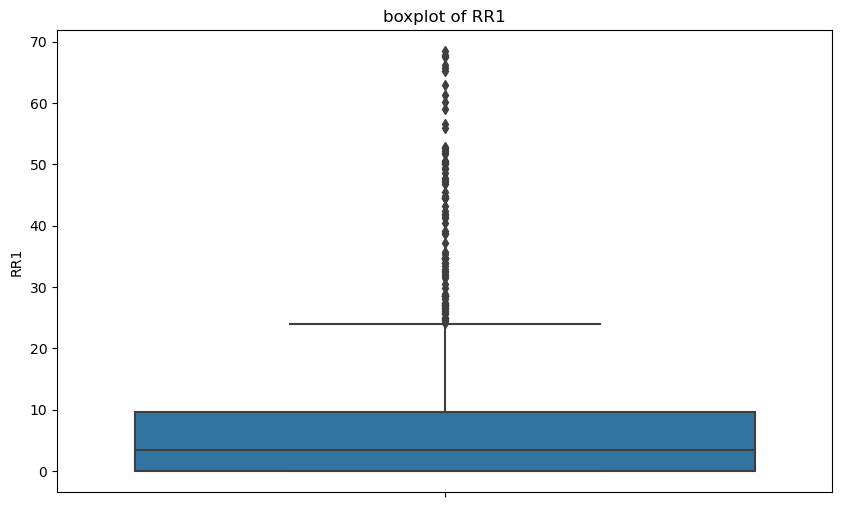

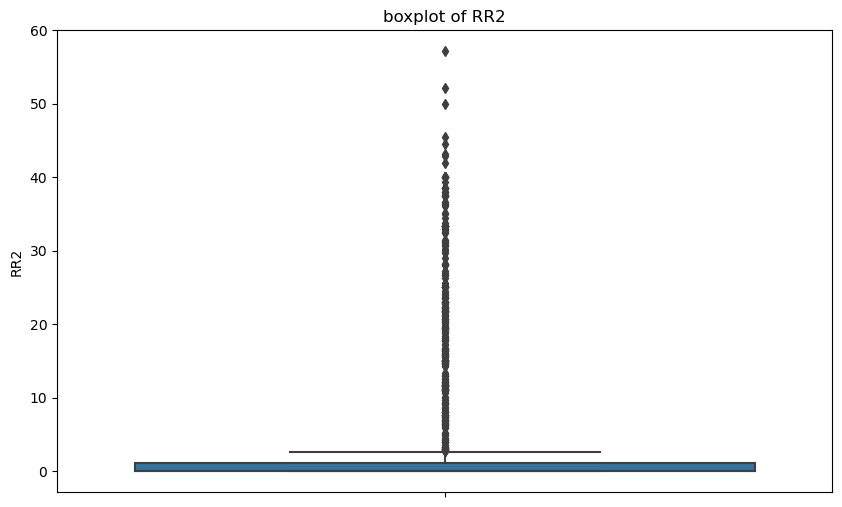

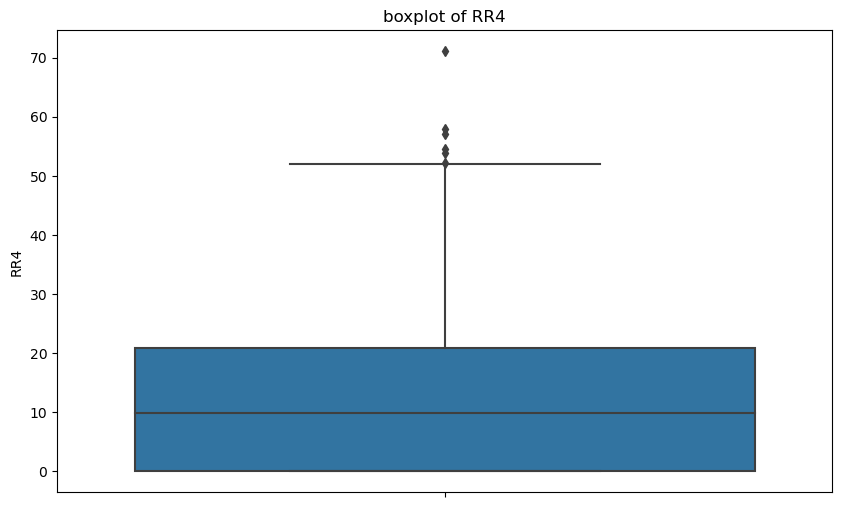

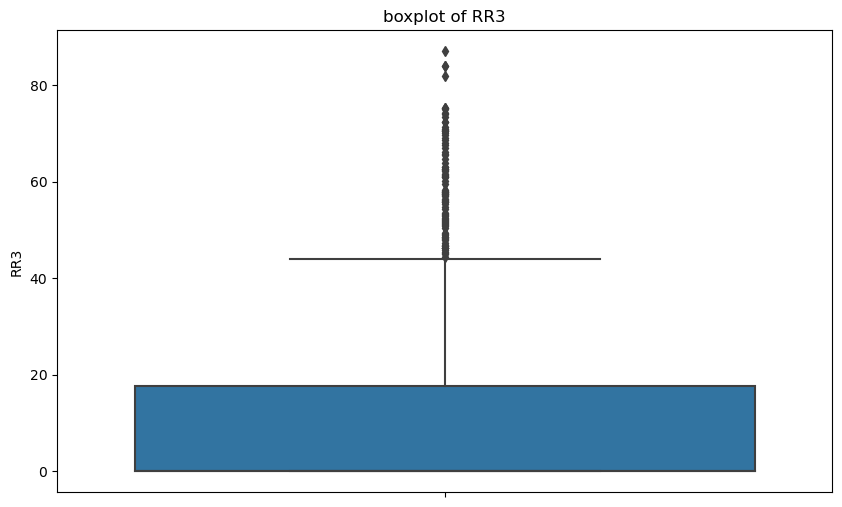

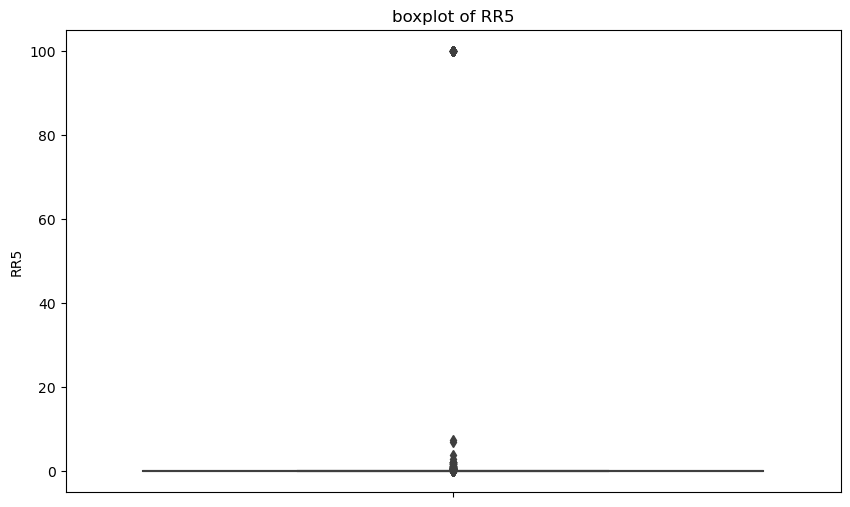

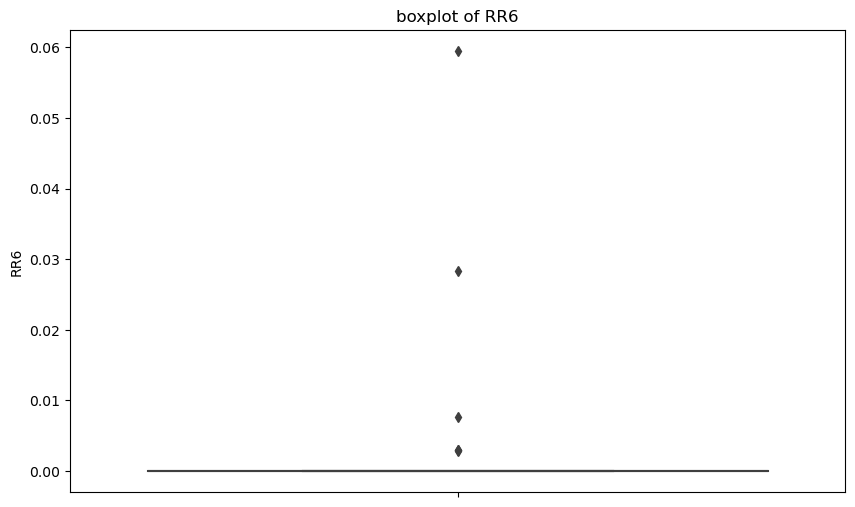

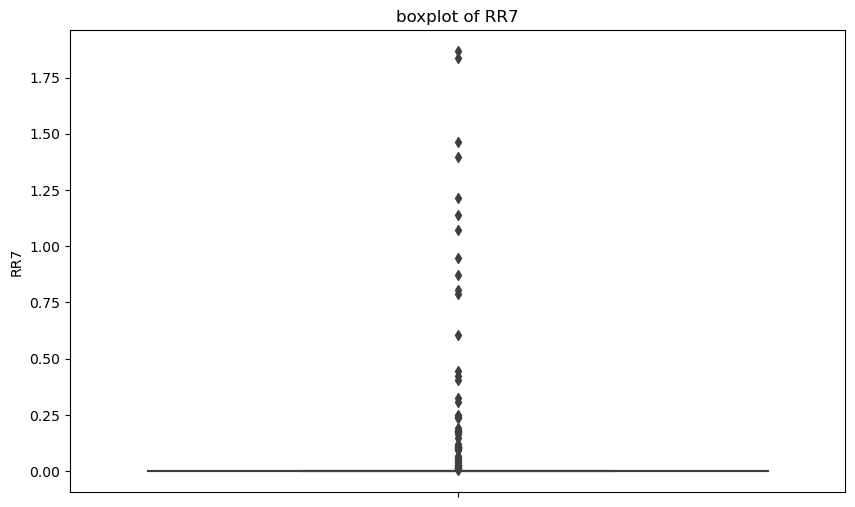

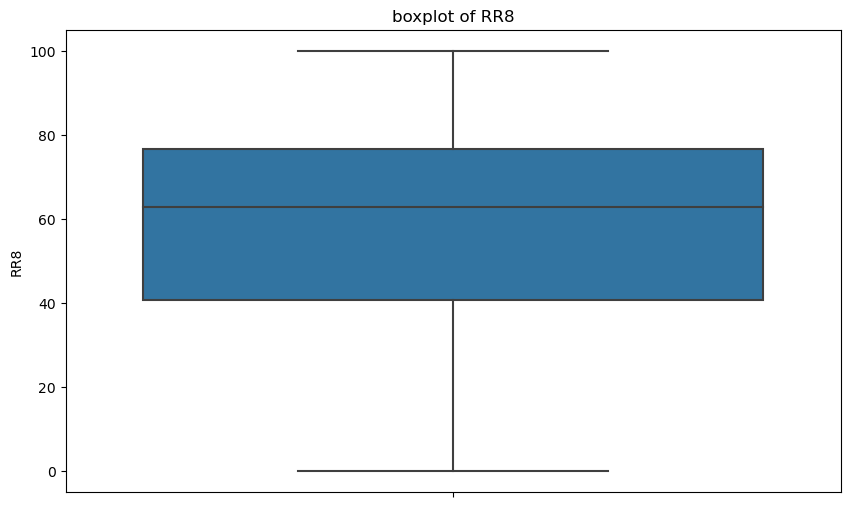

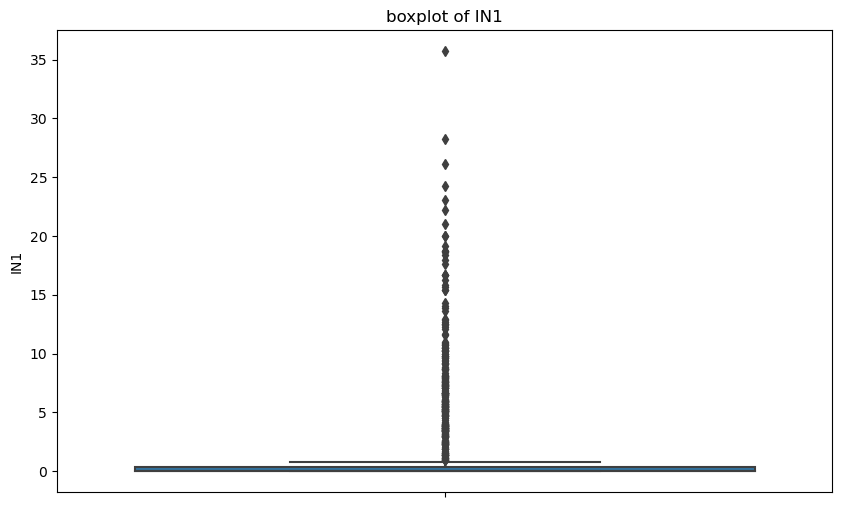

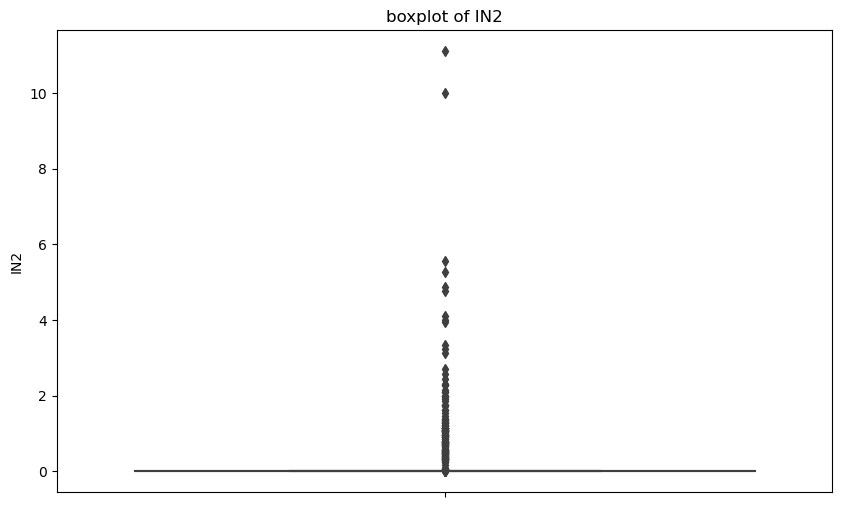

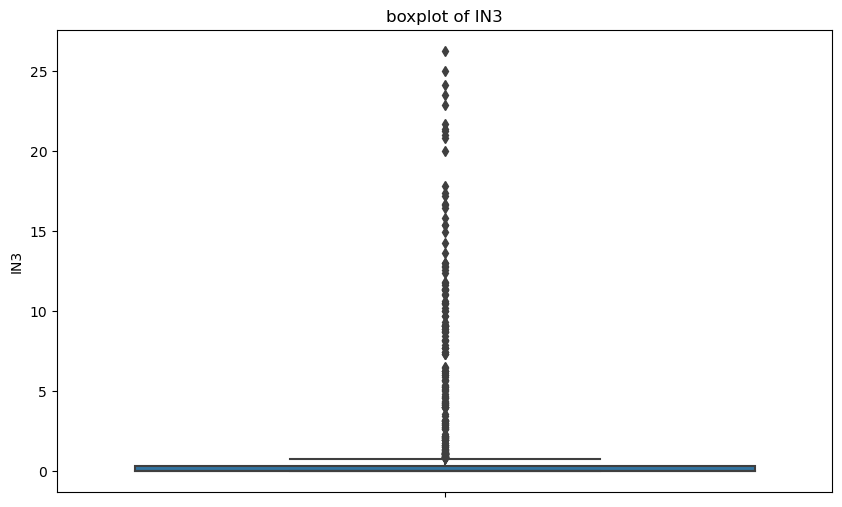

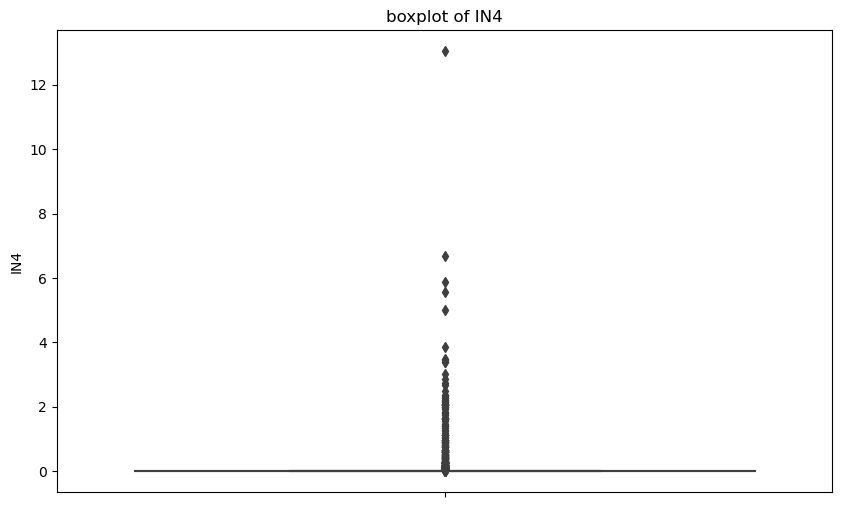

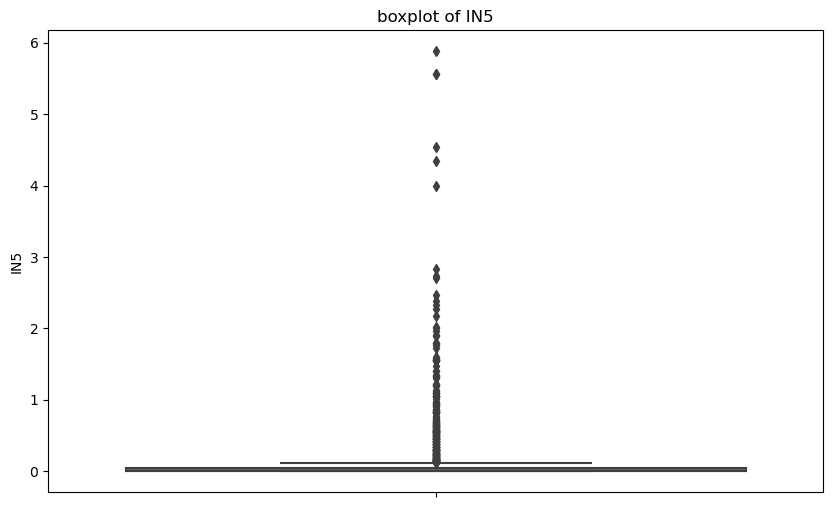

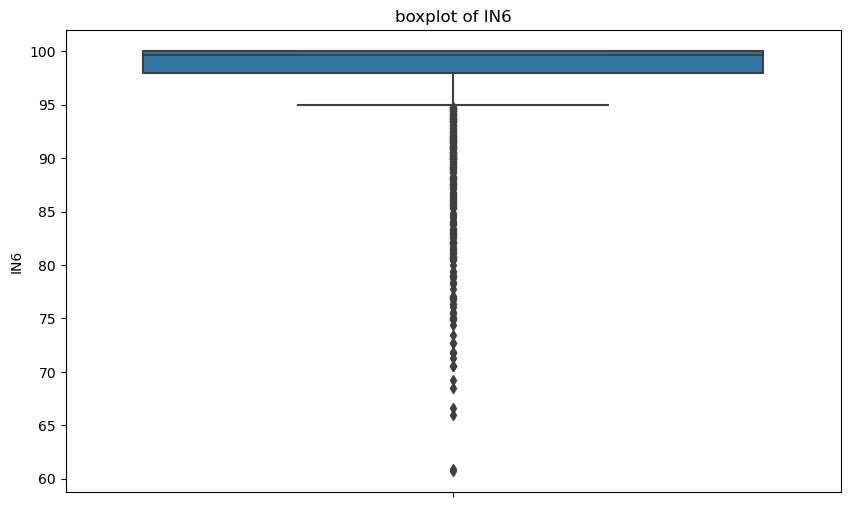

In [8]:
for i in cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(y=data[i])
    plt.title(f'boxplot of {i}')
    plt.show()

In [9]:
for i in cols:
    q1 = data[i].quantile(.25)
    q3 = data[i].quantile(.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    data[i] = np.where(data[i]< lower_bound,lower_bound,data[i])
    data[i] = np.where(data[i]>upper_bound,upper_bound,data[i])

In [15]:
y = data[cols]

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
scaler = StandardScaler()

In [13]:
minmax = MinMaxScaler()

In [16]:
y1 = minmax.fit_transform(y)

In [17]:
s = pd.DataFrame(data= y1,columns= cols)

In [20]:
coll = ['Crash_ID', 'COUNTY_FIPS', 'CNT', 'INC', 'INO','INS','NO_INJURY', 'YES_INJURY','YCA', 'Y19', 'Y20', 'Y21',
       'STATE', 'PPN', 'INR', 'ST', 'ST2', 'ST3', 'ST1', 'LOG_INR']

In [21]:
t = data[coll]

In [22]:
ss = pd.concat([s,t],axis=1)

In [23]:
ss

,WW1,WW3,WW2,WW4,WW9,WW10,WW5,WW6,WW7,WW8,...,Y20,Y21,STATE,PPN,INR,ST,ST2,ST3,ST1,LOG_INR
0,0.0,0.844594,0.135145,0.006965,0.685240,0.134660,0.306595,0.005828,0.002179,0.0,...,0,0,Texas,839238,339.593774,1,0,0,1,5.827750
1,0.0,0.472255,0.505504,0.079438,0.000000,0.586295,0.000000,0.000000,0.000000,0.0,...,0,0,Texas,35529,360.269076,1,0,0,1,5.886851
2,0.0,0.568357,0.385832,0.052092,0.234408,0.516841,0.021874,0.047122,0.002643,0.0,...,0,0,Texas,2635516,376.928085,1,0,0,1,5.932054
3,0.0,0.643661,0.394268,0.252635,0.611818,0.215643,0.366334,0.219847,0.006323,0.0,...,0,0,Texas,310569,513.895463,1,0,0,1,6.242020
4,0.0,0.524444,0.491116,0.112280,0.072317,0.434402,0.020620,0.002665,0.000000,0.0,...,0,0,Texas,4713325,286.994850,1,0,0,1,5.659464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.0,0.566964,0.329528,0.394853,0.000000,0.253411,0.000000,0.000000,1.000000,0.0,...,0,1,Colorado,6442,388.078237,2,1,0,0,5.961207
1181,0.0,0.603486,0.000000,0.000000,0.000000,0.130545,1.000000,0.000000,0.000000,0.0,...,0,1,Colorado,3490,286.532951,2,1,0,0,5.657854
1182,0.0,0.644519,0.121782,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0,1,Colorado,7395,351.588911,2,1,0,0,5.862463
1183,0.0,0.782302,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,...,0,1,Colorado,1719,523.560209,2,1,0,0,6.260652


In [24]:
ss.to_csv('tco_amos_minmax_outlier.csv',index= False)